# Bitcoin Prediction Using ARIMA and RNN-LSTM
## Please refer to the project report for details on results and observations

## Setup

In [1]:
!conda install -c pytorch pytorch-nightly-cpu -y 
!conda install -c fastai torchvision-nightly-cpu -y 
!conda install -c fastai fastai -y 
!pip install tensorflow
!pip install fastai
!conda install nb_conda -y
!pip install dataclasses
!pip install fastai==0.7.0
!pip install keras
!pip install --upgrade pip
!conda remove seaborn -y
!pip uninstall seaborn 
!pip3 --no-cache-dir install seaborn 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.5.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - pytorch-nightly-cpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytorch-nightly-cpu-1.0.0.dev20181220|      py3.6_cpu_0        44.3 MB  pytorch

The following NEW packages will be INSTALLED:

    ninja:               1.8.2-py36h6bb024c_1                     
    pytorch-nightly-cpu: 1.0.0.dev20181220-py3.6_cpu_0 pytorch    

The following packages will be UPDATED:

    certifi:             2018.8.24-py36_1              conda-forge --> 2018.11.29-py36_0


pytorch-nightly-cpu- | 44.3 MB   | ##################################### | 100% 
Preparing transaction: done
V

    100% |████████████████████████████████| 92kB 37.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/9a/1f/0e/3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/18/ea/5e/e36e1b8739e78cd2eba0a08fdc602c2b16a4b263912af8cb64
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built gast absl-py termcolor
fastai 1.0.34 requires torchvision-nightly, which is not installed.
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
  Found existing installation: protobuf 3.6.0
    Uninstalling protobuf-3.6.0:
      Successfully uninstalled protobuf-

spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.5.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - nb_conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nb_conda-2.2.1             |           py36_0          33 KB

The following packages will be UPDATED:

    nb_conda:        2.2.1-py36_0         conda-forge --> 2.2.1-py36_0

    100% |████████████████████████████████| 3.6MB 14.7MB/s ta 0:00:016kB 60.2MB/s eta 0:00:01
    100% |████████████████████████████████| 11.6MB 5.3MB/s eta 0:00:01   43% |█████████████▉                  | 5.0MB 51.2MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 32.9MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 35.6MB/s ta 0:00:01


  Running setup.py bdist_wheel for bcolz ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built bcolz feather-format
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
mizani 0.5.2 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement matplotlib>=3.0.0, but you'll have matplotlib 2.2.2 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: torch 1.0.0.dev20181220
    Uninstalling torch-1.0.0.dev20181220:
      Successfully 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import datetime
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import seaborn as sns
sns.set()
%load_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

Using TensorFlow backend.


Download all the files and Read all the files

In [4]:
%sc!wget 'https://s3.amazonaws.com/sagemakermathan/bitstamp.csv'
%sc !wget 'https://s3.amazonaws.com/sagemakermathan/coinbase.csv'
%sc !wget 'https://s3.amazonaws.com/sagemakermathan/cryptonewskaggle.csv'
%sc !wget 'https://s3.amazonaws.com/sagemakermathan/news.csv'
%sc !wget 'https://s3.amazonaws.com/sagemakermathan/cryptonewskagglecleaned.csv'

In [3]:
coinbase=pd.read_csv('coinbase.csv')
cryptonewsonly=pd.read_csv('cryptonewscleanedallmagic.csv',encoding='iso-8859-1')

## Preprocessing Please look more for util Notebook

In [76]:
# coinbasedata=coinbase[['Open','Close','High','Low','Volume_(BTC)','Volume_(Currency)','Weighted_Price']]
# coinbasedata=coinbasedata.fillna(method='ffill')
# gold=pd.DataFrame()
# gold['Open']=coinbasedata['Open'].resample('D').first().fillna(method='ffill')
# gold['Close']=coinbasedata['Close'].resample('D').last().fillna(method='ffill')
# gold['High']=coinbasedata['High'].resample('D').max().fillna(method='ffill')
# gold['Low']=coinbasedata['Low'].resample('D').min().fillna(method='ffill')
# gold['Volume_(BTC)']=coinbasedata['Volume_(BTC)'].resample('D').sum().fillna(method='ffill')
# gold['Volume_(Currency)']=coinbasedata['Volume_(Currency)'].resample('D').sum().fillna(method='ffill')
# gold['Weighted_Price']=coinbasedata['Weighted_Price'].resample('D').mean().fillna(method='ffill')
# gold=gold['2015':]
# gold.to_csv('Bitcoin2015Daily.csv')

## Data Exploration

In [4]:
coinbase.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
coinbase.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2016349,1541894160,6347.41,6347.42,6347.41,6347.42,0.484960,3078.241490,6347.417225
2016350,1541894220,6347.41,6347.42,6347.41,6347.42,0.770757,4892.318043,6347.419294
2016351,1541894280,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653
2016352,1541894340,6347.41,6347.42,6347.41,6347.42,1.714091,10880.053958,6347.418881
2016353,1541894400,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439


In [6]:
coinbase.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.016354e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06
mean,1.481396e+09,3.208583e+03,3.209990e+03,3.207058e+03,3.208584e+03,7.684054e+00,3.551276e+04,3.208523e+03
std,3.493807e+07,3.873144e+03,3.875432e+03,3.870698e+03,3.873140e+03,1.820454e+01,1.411277e+05,3.873066e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.451159e+09,4.156000e+02,4.156800e+02,4.155000e+02,4.155900e+02,8.776600e-01,5.962574e+02,4.155902e+02
50%,1.481404e+09,9.099600e+02,9.101000e+02,9.095700e+02,9.099800e+02,2.641103e+00,3.313449e+03,9.099194e+02
75%,1.511649e+09,6.374660e+03,6.375150e+03,6.373310e+03,6.374670e+03,7.478157e+00,1.855195e+04,6.374404e+03
max,1.541894e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


In [7]:
cryptonewsonly.describe()

,Unnamed: 0
count,16606.00000
mean,8302.50000
std,4793.88362
min,0.00000
25%,4151.25000
50%,8302.50000
75%,12453.75000
max,16605.00000


In [8]:
coinbase.isna().sum()/coinbase.count()

Timestamp            0.000000
Open                 0.057123
High                 0.057123
Low                  0.057123
Close                0.057123
Volume_(BTC)         0.057123
Volume_(Currency)    0.057123
Weighted_Price       0.057123
dtype: float64

Relatively there are fewer NAN Values in Coinbase dataset and we wanted to select one of them so we go with Coinbase dataset for now.

First of First, I feel timestamp values are not humanly readable so let's convert it into a normal date first

In [9]:
def timestampToDateTime(timestamp):
    from datetime import datetime
    return datetime.fromtimestamp(timestamp)
coinbase['Date']=coinbase['Timestamp'].apply(timestampToDateTime)

In [10]:
coinbase.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01 05:33:00
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:34:00
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:35:00
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:36:00
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:37:00


Let's get rid of the timestamp Now

In [11]:
coinbase.drop('Timestamp',axis=1,inplace=True) 

Let's verify if everything looks good

In [12]:
coinbase.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01 05:33:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:34:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:35:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:36:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 05:37:00


In [13]:
coinbase.isna().sum()/coinbase.count()

Open                 0.057123
High                 0.057123
Low                  0.057123
Close                0.057123
Volume_(BTC)         0.057123
Volume_(Currency)    0.057123
Weighted_Price       0.057123
Date                 0.000000
dtype: float64

In [14]:
coinbase[coinbase['Date']=='2016']

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
511553,430.35,430.39,430.35,430.39,0.0727,31.288653,430.380371,2016-01-01


To fetch all the data for a year, we need to first index the dataframe by date and then we can query intresting things and explore the data more. This is pretty common in time series analysis and useful for data exploration too.

In [15]:
timeindex=pd.DatetimeIndex(coinbase['Date'])

In [16]:
coinbase.set_index(timeindex,inplace=True)

As you can see now we can fetch data with respect to a particular date. Let's do some exploration now! 

In [17]:
coinbase['2016-01-21'].head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
Date,,,,,,,,
2016-01-21 00:00:00,418.89,419.22,418.72,418.72,7.564173,3169.440356,419.006862,2016-01-21 00:00:00
2016-01-21 00:01:00,418.90,418.97,418.76,418.78,16.812530,7040.824523,418.784354,2016-01-21 00:01:00
2016-01-21 00:02:00,418.94,418.99,418.94,418.96,31.659400,13264.092180,418.962210,2016-01-21 00:02:00
2016-01-21 00:03:00,419.01,419.01,418.96,418.96,12.206630,5114.149465,418.964896,2016-01-21 00:03:00
2016-01-21 00:04:00,418.99,419.00,418.99,418.99,10.416198,4364.289083,418.990585,2016-01-21 00:04:00


Just to confirm that the dataset is a legitimate one, we plot the bitcoin values for year 2017-18 and as we know that the spike in the market we can confirm that the dataset is legitimate.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


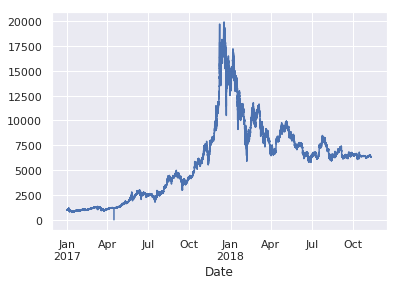

In [18]:
#sns.set(style="darkgrid")
import seaborn as sns; sns.set()
#sns.lineplot(x="Date", y="Close",
#             data=coinbase)
coinbase['2017':'2018']['High'].resample(rule='T').plot()

Time to learn new things

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  app.launch_new_instance()


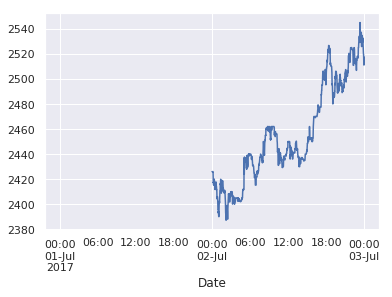

In [19]:
data=coinbase['2017-07-02']
data['High'].plot(style="-")
data['High'].resample('BM').plot(style=":")

 Notice the difference: at each point, resample reports the average of the previous year, while asfreq reports the value at the end of the year. You can resample by hour, minutes, years, days etc. This indeed is a convenient tool."

In [20]:
def preprocess(dataframe):
    data=data.fillna(method='ffill')
    data=add_datepart(data, 'Date')
    return data

As we noticed there are few NAN values and we dont want to drop those values. Since it is a time series data, we need to be extremely careful how we handle these values.
There are two options:
1. Fill the missing values with previous values (forward fill)
2. Fill the missing values with future values (backward fill)

We choose forward Fill

In [21]:
coinbase=coinbase.fillna(method='ffill')

The most basic form of analysis: Let's find the co-relation and see if we can find anything useful. Nothing intresting as all the features are computed from each other.

In [22]:
coinbase.corr()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999998,0.999998,0.999997,0.161845,0.408597,0.999999
High,0.999998,1.000000,0.999996,0.999998,0.162431,0.409438,0.999999
Low,0.999998,0.999996,1.000000,0.999998,0.161182,0.407686,0.999999
Close,0.999997,0.999998,0.999998,1.000000,0.161820,0.408588,0.999999
Volume_(BTC),0.161845,0.162431,0.161182,0.161820,1.000000,0.700766,0.161792
Volume_(Currency),0.408597,0.409438,0.407686,0.408588,0.700766,1.000000,0.408544
Weighted_Price,0.999999,0.999999,0.999999,0.999999,0.161792,0.408544,1.000000


We predict the price for the bitcoin after 2 days in this case. Therefore we need to prepare the dataframe with input row as todays price and predictor as price after 2 days. 

In [23]:
coinbase['PriceClose2D']=coinbase['Close']

In [24]:
shift=24 # 24 hours = 2days 
coinbase['PriceClose2D']=coinbase['PriceClose2D'].shift(-shift)
coinbase=coinbase[:-shift]

In [25]:
coinbase[73:90]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,PriceClose2D
Date,,,,,,,,,
2014-12-01 06:46:00,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01 06:46:00,370.0
2014-12-01 06:47:00,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01 06:47:00,370.0
2014-12-01 06:48:00,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01 06:48:00,370.0
2014-12-01 06:49:00,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01 06:49:00,370.0
2014-12-01 06:50:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 06:50:00,370.0
2014-12-01 06:51:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 06:51:00,370.0
2014-12-01 06:52:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 06:52:00,370.0
2014-12-01 06:53:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 06:53:00,370.0
2014-12-01 06:54:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 06:54:00,370.0


Now inorder to capture temporal features for very basic algorithms we add date time features dervied from datetime like isweekday,
is weekday, is public holiday etc to capture seasonal trends which we will cover in detail in a minute.

In [26]:
add_datepart(coinbase,'Date')

In [27]:
coinbase['2015']

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,PriceClose2D,Year,Month,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-08 01:24:00,360.00,360.00,360.00,360.00,0.010000,3.600000,360.000000,317.98,2015,1,...,8,3,8,False,False,False,False,False,False,1420680240
2015-01-08 01:25:00,360.00,360.00,360.00,360.00,0.010000,3.600000,360.000000,301.99,2015,1,...,8,3,8,False,False,False,False,False,False,1420680300
2015-01-08 01:26:00,360.00,360.00,360.00,360.00,0.010000,3.600000,360.000000,333.28,2015,1,...,8,3,8,False,False,False,False,False,False,1420680360
2015-01-08 01:27:00,271.84,276.34,271.84,276.34,0.020000,5.481800,274.090000,329.03,2015,1,...,8,3,8,False,False,False,False,False,False,1420680420
2015-01-08 01:28:00,295.19,319.84,271.60,271.60,0.030000,8.866300,295.543333,318.88,2015,1,...,8,3,8,False,False,False,False,False,False,1420680480
2015-01-08 01:29:00,344.67,344.67,344.67,344.67,0.010000,3.446700,344.670000,326.47,2015,1,...,8,3,8,False,False,False,False,False,False,1420680540
2015-01-08 01:30:00,346.41,346.41,305.38,305.38,0.020000,6.517900,325.895000,331.94,2015,1,...,8,3,8,False,False,False,False,False,False,1420680600
2015-01-08 01:31:00,345.11,345.11,270.35,270.35,0.030000,8.901400,296.713333,312.07,2015,1,...,8,3,8,False,False,False,False,False,False,1420680660
2015-01-08 01:32:00,333.68,345.44,333.68,345.44,0.030000,10.140900,338.030000,285.69,2015,1,...,8,3,8,False,False,False,False,False,False,1420680720


In [28]:
coinbase.corr()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,PriceClose2D,Year,Month,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Open,1.000000,0.999998,0.999998,0.999997,0.161848,0.408601,0.999999,0.999939,0.759325,0.067457,...,-0.004283,0.002734,0.065973,-0.001450,-0.003857,-0.001774,-0.001980,0.022534,0.022791,0.772079
High,0.999998,1.000000,0.999996,0.999998,0.162435,0.409441,0.999999,0.999940,0.759188,0.067436,...,-0.004278,0.002731,0.065953,-0.001454,-0.003867,-0.001776,-0.001986,0.022547,0.022796,0.771938
Low,0.999998,0.999996,1.000000,0.999998,0.161186,0.407689,0.999999,0.999940,0.759466,0.067483,...,-0.004288,0.002736,0.065998,-0.001448,-0.003846,-0.001771,-0.001974,0.022519,0.022782,0.772226
Close,0.999997,0.999998,0.999998,1.000000,0.161824,0.408592,0.999999,0.999942,0.759322,0.067465,...,-0.004285,0.002734,0.065981,-0.001450,-0.003856,-0.001772,-0.001980,0.022536,0.022790,0.772078
Volume_(BTC),0.161848,0.162435,0.161186,0.161824,1.000000,0.700766,0.161795,0.162087,0.088634,0.007600,...,-0.015111,-0.041325,0.006059,-0.005342,-0.006074,-0.008781,-0.013923,-0.001985,-0.006797,0.089792
Volume_(Currency),0.408601,0.409441,0.407689,0.408592,0.700766,1.000000,0.408548,0.408886,0.223065,0.037395,...,-0.010549,-0.016482,0.036368,-0.006403,-0.006600,-0.007769,-0.011206,0.008317,0.001724,0.231154
Weighted_Price,0.999999,0.999999,0.999999,0.999999,0.161795,0.408548,1.000000,0.999941,0.759327,0.067460,...,-0.004284,0.002734,0.065976,-0.001451,-0.003857,-0.001774,-0.001980,0.022533,0.022788,0.772082
PriceClose2D,0.999939,0.999940,0.999940,0.999942,0.162087,0.408886,0.999941,1.000000,0.759307,0.067533,...,-0.004309,0.002744,0.066046,-0.001424,-0.003847,-0.001730,-0.001995,0.022599,0.022780,0.772080
Year,0.759325,0.759188,0.759466,0.759322,0.088634,0.223065,0.759327,0.759307,1.000000,-0.104269,...,-0.016244,0.005658,-0.106359,-0.003117,0.000930,-0.005048,0.013858,-0.019084,0.023007,0.967883
Month,0.067457,0.067436,0.067483,0.067465,0.007600,0.037395,0.067460,0.067533,-0.104269,1.000000,...,-0.019061,0.003713,0.996257,-0.006380,0.010639,0.024885,-0.018588,0.077452,-0.074648,0.148165


In [29]:
# Optional Step if you want to convert problem into classification problem and use a Deep ANN
# #coinbase['increaseAfterX']=coinbase['Close']-coinbase['PriceClose2H']
# #coinbase['increaseAfterX']=coinbase['increaseAfterX']>0
# coinbase['increaseAfterX']=coinbase.apply(lambda row:row['Close']-row['PriceClose2H']<0, axis=1).astype(int)b

## Financial Stock Market Analysis

Financial Markets & companies all around the globe often use variety of mathematical models to predict and analyze stock market. One such measure is autocorrelation. Intutively, it is very similar to correlation but dependent on  lagged variables. The wikipedia article is a good read. Though simple it is a powerful tool used by many stock market brokers to mint money.
https://en.wikipedia.org/wiki/Autocorrelation

There is one problem with the prices of bitcoin and time series domain as a whole that it has alot of variability. Intuitvely, on a higher level there are many hidden patterns in the time series data but are subject to price changes in a particular year. For example the prices of bitcoin increase in particular year as compared to other, some models are very senstive to the range of values. (aka 'Seasonality'). The best way to avoid this is by making the signal stationary. (stationary?? - subtract the previous value from the current value (Technical jargon: First order difference))

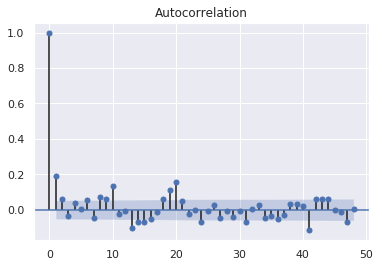

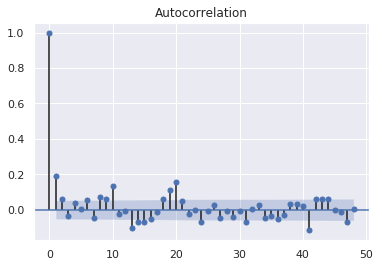

In [30]:
arima2015day=coinbase['2015':].resample('D').mean().fillna(method='ffill')['Close']
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(arima2015day.diff().dropna(), lags= 48, alpha=0.05)

So what does this graph represent? If you observe the autocorrelation value for the present value with itself is 1.0(since current value is totally dependent on current value) and then the correlation goes on decreasing. Intutively, this plot gives you a good guess of the window size to consider for predicting todays bitcoin value.

# Training & Testing

## Model 1: RANDOM FOREST :|

Though many financial analysts and domain experts would argue why random forests for a time series data?? We were performing this project as a part of Machine Learning course and wanted to evaluate its performance over other tradtional models.

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
coinbase

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,PriceClose2D,Year,Month,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-01 05:33:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417411980
2014-12-01 05:34:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412040
2014-12-01 05:35:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412100
2014-12-01 05:36:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412160
2014-12-01 05:37:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412220
2014-12-01 05:38:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412280
2014-12-01 05:39:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412340
2014-12-01 05:40:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412400
2014-12-01 05:41:00,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,300.00,2014,12,...,1,0,335,False,True,False,False,False,False,1417412460


The important thing to note for time series data is you # CANNOT shuffle the data around as you will loose all the temporal patterns. Make sure to shuffle=false

In [32]:
from sklearn.model_selection import train_test_split
trainColumns=['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
predictColumn='PriceClose2D'
X=coinbase[trainColumns]
y=coinbase[predictColumn]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,shuffle=False)

In [33]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


20 23.904274914135275 44.1832973947234
building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


25 19.819067696712516 46.60960602046178
building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


30 18.518996363251322 47.566669716941796
building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


35 18.320901629169043 48.39190001714336


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [35]:
train_error

[44.1832973947234, 46.60960602046178, 47.566669716941796, 48.39190001714336]

Let's plot the curve and see the confusion matrix

3629394

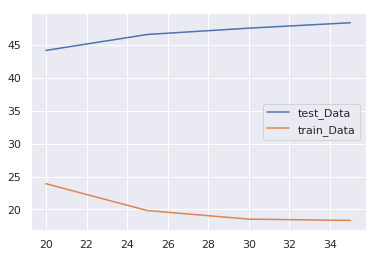

In [43]:
from sklearn.metrics import confusion_matrix
# print(confusion_matrix(models[2].predict(X_test), y_test))
train_plot=pd.DataFrame(train_error,index=range(20,40,5),columns=["test_Data"])
test_plot=pd.DataFrame(test_error,index=range(20,40,5),columns=["train_Data"])
plotdata=pd.concat([train_plot,test_plot],axis=1)
plotdata.plot()
X_test.size

As you can see the training error and test error are apart and as we increase the depth the model tends to overfit. (Expected)

In [44]:
y_test.head()

Date
2018-06-23 23:04:00    6178.60
2018-06-23 23:05:00    6178.25
2018-06-23 23:06:00    6178.24
2018-06-23 23:07:00    6178.25
2018-06-23 23:08:00    6178.25
Name: PriceClose2D, dtype: float64

In [49]:
# from sklearn.metrics import mean_squared_error
# print('testing error',mean_squared_error(regr.predict(X_test),y_test))
# print('training error',mean_squared_error(regr.predict(X_train),y_train))

## Model 2: Recurrent Neural Networks with LSTM and GRU (Seq to Seq) :0

#### Bitcoin2015Daily => Contains all the prices aggregated by day.

In [53]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series

data=pd.read_csv('Bitcoin2015Daily.csv')


data=data.set_index(pd.DatetimeIndex(data['Date']))['Close']
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

look_back=3
#data=difference(data,look_back)


#def project(data,look_back):
    #convert an array of values into a dataset matrix
    

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(0)

# load the dataset
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler()
#scaler=RobustScaler()
#scaler=StandardScaler()
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
#look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
#model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
#model.add(LSTM(100, input_shape=(1, look_back)))

model.add(Dense(1))
import keras
from keras import optimizers

#keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False, clipnorm=1)

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, verbose=1,shuffle=False,batch_size=50)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#data=pd.DataFrame(numpy.concatenate((trainPredict[0:len(trainPredict)-look_back-1],testPredict[0:len(testPredict)-look_back-1])),columns=["predicted"])
#print('one',data.count())
#print('two',dataframe.count())
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

#return ans,[look_back,trainScore,testScore]

#     # shift train predictions for plotting
#     trainPredictPlot = numpy.empty_like(dataset)
#     trainPredictPlot[:, :] = numpy.nan
#     trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#     # shift test predictions for plotting
#     testPredictPlot = numpy.empty_like(dataset)
#     testPredictPlot[:, :] = numpy.nan
#     testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    
#     # plot baseline and predictions
#     plt.plot(scaler.inverse_transform(dataset))
#     plt.plot(trainPredictPlot)
#     plt.plot(testPredictPlot)
#     plt.show()

Epoch 1/50
940/940 [==============================] - 1s 2ms/step - loss: 3.8474e-04
Epoch 2/50
940/940 [==============================] - 0s 256us/step - loss: 0.0024
Epoch 3/50
940/940 [==============================] - 0s 255us/step - loss: 6.4764e-04
Epoch 4/50
940/940 [==============================] - 0s 251us/step - loss: 7.7444e-04
Epoch 5/50
940/940 [==============================] - 0s 256us/step - loss: 3.0776e-04
Epoch 6/50
940/940 [==============================] - 0s 253us/step - loss: 8.4690e-05
Epoch 7/50
940/940 [==============================] - 0s 262us/step - loss: 1.8288e-05
Epoch 8/50
940/940 [==============================] - 0s 249us/step - loss: 4.3297e-05
Epoch 9/50
940/940 [==============================] - 0s 251us/step - loss: 1.0647e-05
Epoch 10/50
940/940 [==============================] - 0s 249us/step - loss: 8.9587e-06
Epoch 11/50
940/940 [==============================] - 0s 272us/step - loss: 8.4198e-06
Epoch 12/50
940/940 [==========================

Let's plot and compare the prices predicted and actual price.

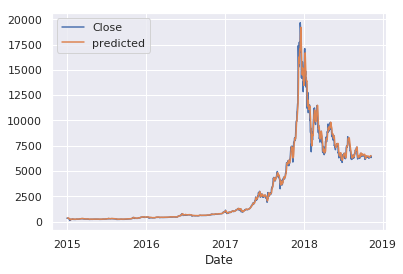

In [55]:
ans.plot()

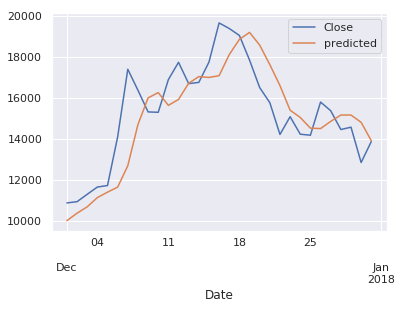

In [58]:
ans['2017-12'].plot()

The above graph is bitcoin prediction during the great bitcoin fall in 2017 December. As you can see its pretty close. 

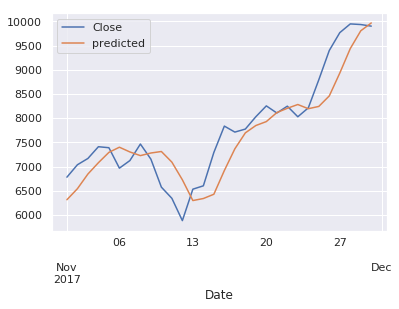

In [65]:
ans['2017-11'].plot() 

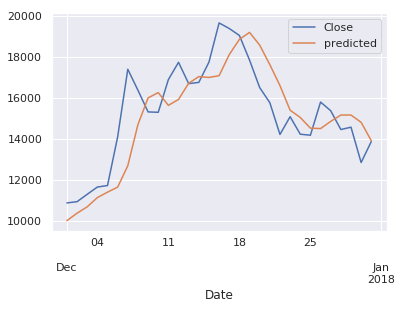

In [66]:
ans['2017-12'].plot() 

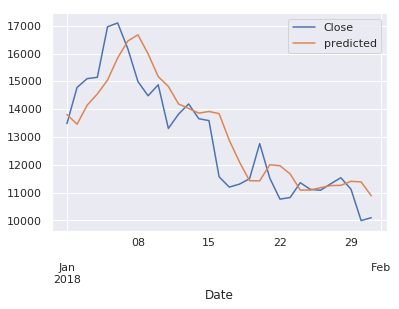

In [67]:
ans['2018-01'].plot() 

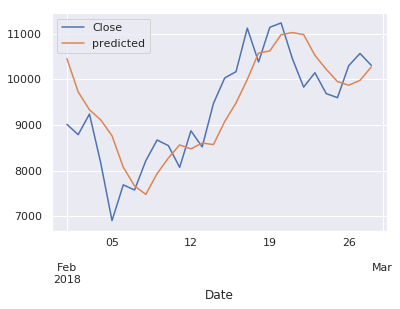

In [68]:
ans['2018-02'].plot() 

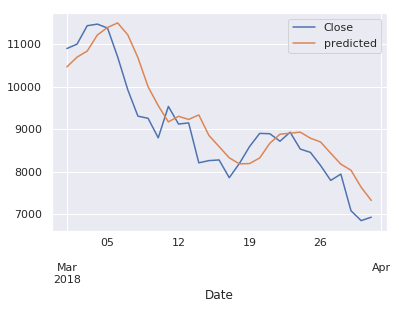

In [69]:
ans['2018-03'].plot() 

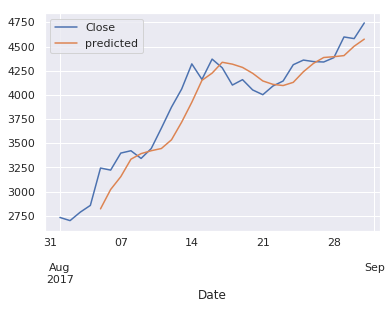

In [71]:
ans['2017-08'].plot() 

In [56]:
# #Lookup analysis
# rmse=[]
# datas=[]
# for i in range(1,100,5):
#     data,error=project(i)
#     rmse.append(error)
#     datas.append(data)

In [72]:
# scaler.inverse_transform(trainX[31])

# Model 3: ARIMA MODEL :)

Autoregressive Integrated Moving Average Model. An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts

Note: The accuracy of Arima Model here is better as we are training for 50% of data and then while testing we are training the whole data set again + the any new instance. So on a high level the model predicts price of next day given last few days price. 

In [73]:
arima2015hour=coinbase['2015':].resample('D').mean().fillna(method='ffill')['Close']

What we are intrested in is not the price but the trend and finding if there is any hidden pattern in ups and down of bitcoin price. We therefore first take the difference of each Xt with its previous price to signify if the price has increased or decreased and see if there is any autocorrelation and find the approximate lagging. We find this graph to be indicating a good lag to be around 30.

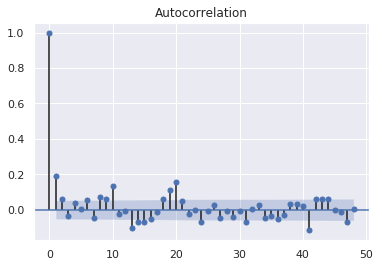

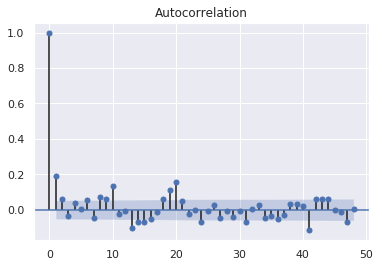

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
#hourarim=arima2015hour.resample('H').mean()['Close']
plot_acf(arima2015hour.diff().dropna(), lags= 48, alpha=0.05)
#arima2015hour['Close'].pct_change().autocorr()
#dayarima.diff()
#arima2015hour.dropna().diff().plot()

Often financial stock market analysts use some statistical measure to see if the prices are predictable or not. (Technically speaking if the prices are random walk or even if its white noise.) Test TO find if the data is random walk. Which is Not. 

In [75]:
from statsmodels.tsa.stattools import adfuller
adfuller(arima2015hour)[1]

0.47447987655531804

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
train,test = train_test_split(arima2015hour,test_size=0.24,shuffle=False)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(arima2015hour, order=(4,4))
result = mod.fit()

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARMA(history,order=(5,1))
    model_fit = mod.fit()
    yhat = model_fit.forecast()
    yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
    predictions.append(yhat_p)
    # observation
    obs = test[i] 
    history.append(obs)
    print(str(yhat_p)+' '+' '+ str(history[-4:])+' '+str(obs)+' '+str(i)+' ')


16297.183073536282  [12732.03070138887, 15493.172388888888, 16144.979236111114, 15574.154416666643] 15574.154416666643 0 
15397.150049336873  [15493.172388888888, 16144.979236111114, 15574.154416666643, 14779.160097222219] 14779.160097222219 1 
14715.47336773422  [16144.979236111114, 15574.154416666643, 14779.160097222219, 16693.400402777803] 16693.400402777803 2 
16922.993409830247  [15574.154416666643, 14779.160097222219, 16693.400402777803, 17133.031465277738] 17133.031465277738 3 
17224.307847133943  [14779.160097222219, 16693.400402777803, 17133.031465277738, 17139.606777777775] 17139.606777777775 4 
16927.070929825597  [16693.400402777803, 17133.031465277738, 17139.606777777775, 16791.305166666643] 16791.305166666643 5 
16869.566469836966  [17133.031465277738, 17139.606777777775, 16791.305166666643, 17548.66850694447] 17548.66850694447 6 
17573.745069917255  [17139.606777777775, 16791.305166666643, 17548.66850694447, 18467.820166666614] 18467.820166666614 7 
18798.465302749846  [

9217.626107094366  [8619.035437500017, 8615.99859722222, 9019.139416666687, 9798.3624375] 9798.3624375 68 
10042.214968090648  [8615.99859722222, 9019.139416666687, 9798.3624375, 10017.390673611098] 10017.390673611098 69 
9995.66662902428  [9019.139416666687, 9798.3624375, 10017.390673611098, 10684.652395833347] 10684.652395833347 70 
10698.470727199914  [9798.3624375, 10017.390673611098, 10684.652395833347, 10729.090354166656] 10729.090354166656 71 
10606.371493199094  [10017.390673611098, 10684.652395833347, 10729.090354166656, 10852.905000000013] 10852.905000000013 72 
10770.869215163068  [10684.652395833347, 10729.090354166656, 10852.905000000013, 11493.998937499999] 11493.998937499999 73 
11659.134011195314  [10729.090354166656, 10852.905000000013, 11493.998937499999, 10780.311527777787] 10780.311527777787 74 
10712.251106310658  [10852.905000000013, 11493.998937499999, 10780.311527777787, 10267.79890277777] 10267.79890277777 75 
10263.895633349257  [11493.998937499999, 10780.3115

9406.998434118308  [8889.286215277789, 8892.973604166687, 9312.592652777788, 9207.445152777775] 9207.445152777775 137 
9165.155985777072  [8892.973604166687, 9312.592652777788, 9207.445152777775, 8882.526166666667] 8882.526166666667 138 
8815.080733986506  [9312.592652777788, 9207.445152777775, 8882.526166666667, 9212.623145833331] 9212.623145833331 139 
9266.81001956079  [9207.445152777775, 8882.526166666667, 9212.623145833331, 9236.83329861113] 9236.83329861113 140 
9224.420301185606  [8882.526166666667, 9212.623145833331, 9236.83329861113, 9344.712749999973] 9344.712749999973 141 
9321.06400107887  [9212.623145833331, 9236.83329861113, 9344.712749999973, 9283.216534722218] 9283.216534722218 142 
9280.610210585646  [9236.83329861113, 9344.712749999973, 9283.216534722218, 8987.233124999993] 8987.233124999993 143 
8896.113592166206  [9344.712749999973, 9283.216534722218, 8987.233124999993, 9109.845611111117] 9109.845611111117 144 
9146.407593735052  [9283.216534722218, 8987.23312499999

6470.346172224774  [6363.078583333331, 6347.295979166675, 6453.177125000006, 6597.636812499984] 6597.636812499984 206 
6652.281864522685  [6347.295979166675, 6453.177125000006, 6597.636812499984, 6571.794708333331] 6571.794708333331 207 
6524.4965874005175  [6453.177125000006, 6597.636812499984, 6571.794708333331, 6580.700847222231] 6580.700847222231 208 
6571.506721812298  [6597.636812499984, 6571.794708333331, 6580.700847222231, 6541.403215277766] 6541.403215277766 209 
6489.537052094271  [6571.794708333331, 6580.700847222231, 6541.403215277766, 6571.94011111109] 6571.94011111109 210 
6568.9497947071095  [6580.700847222231, 6541.403215277766, 6571.94011111109, 6735.545048611109] 6735.545048611109 211 
6758.57196870997  [6541.403215277766, 6571.94011111109, 6735.545048611109, 6703.552736111111] 6703.552736111111 212 
6719.2112997363165  [6571.94011111109, 6735.545048611109, 6703.552736111111, 6480.439673611077] 6480.439673611077 213 
6445.11761986936  [6735.545048611109, 6703.55273611

6204.527574257176  [6445.112874999991, 6361.866361111103, 6294.207402777775, 6288.220666666666] 6288.220666666666 275 
6322.725527887089  [6361.866361111103, 6294.207402777775, 6288.220666666666, 6291.030597222219] 6291.030597222219 276 
6324.441604318401  [6294.207402777775, 6288.220666666666, 6291.030597222219, 6268.0327361110985] 6268.0327361110985 277 
6350.543266553539  [6288.220666666666, 6291.030597222219, 6268.0327361110985, 6440.470868055535] 6440.470868055535 278 
6489.112241775156  [6291.030597222219, 6268.0327361110985, 6440.470868055535, 6499.649277777766] 6499.649277777766 279 
6507.681939807664  [6268.0327361110985, 6440.470868055535, 6499.649277777766, 6517.507756944436] 6517.507756944436 280 
6433.172150770478  [6440.470868055535, 6499.649277777766, 6517.507756944436, 6483.263145833307] 6483.263145833307 281 
6420.159609290988  [6499.649277777766, 6517.507756944436, 6483.263145833307, 6397.593888888873] 6397.593888888873 282 
6317.132837002529  [6517.507756944436, 6483

In [413]:
pd.concat([pd.DataFrame(predictions,index=test.index,columns=['predictions']),test],axis=1)

,predictions,Close
Date,,
2017-12-09,16297.183074,15574.154417
2017-12-10,15397.150049,14779.160097
2017-12-11,14715.473368,16693.400403
2017-12-12,16922.993410,17133.031465
2017-12-13,17224.307847,17139.606778
2017-12-14,16927.070930,16791.305167
2017-12-15,16869.566470,17548.668507
2017-12-16,17573.745070,18467.820167
2017-12-17,18798.465303,19537.653319


In [408]:
error=math.sqrt(mean_squared_error(test,predictions))
error

405.2444219277155

In [433]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(arima2015hour, order=(4,4))
result = mod.fit()

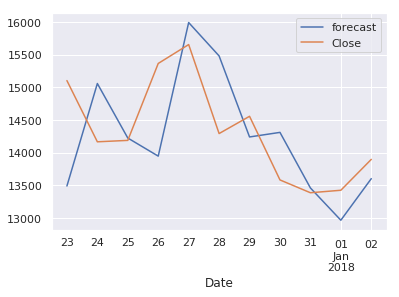

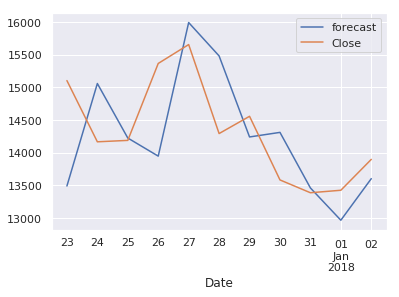

In [466]:
result.plot_predict(start=1080,end=1090)

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                33671
Model:                     ARMA(4, 4)   Log Likelihood             -180313.267
Method:                       css-mle   S.D. of innovations             51.214
Date:                Thu, 13 Dec 2018   AIC                         360646.535
Time:                        07:53:13   BIC                         360730.779
Sample:                    01-08-2015   HQIC                        360673.418
                         - 11-10-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3059.5062        nan        nan        nan         nan         nan
ar.L1.Close     1.4837        nan        nan        nan         nan         nan
ar.L2.Close     0.1348        nan        nan    

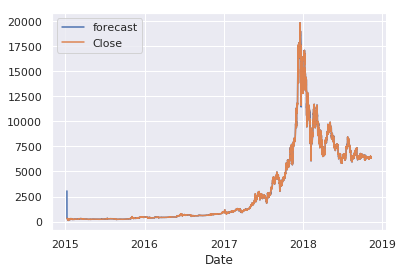

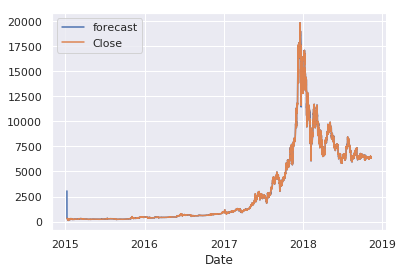

In [317]:
print(result.summary())
result.plot_predict()

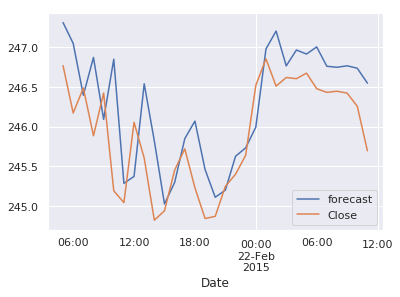

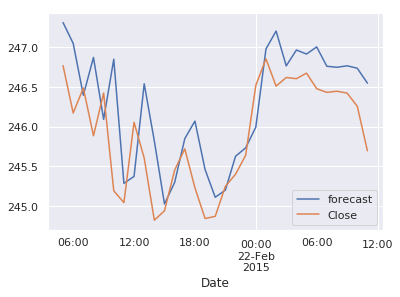

In [243]:
result.plot_predict(start=1060, end=1090)

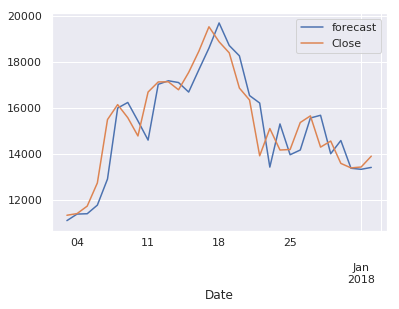

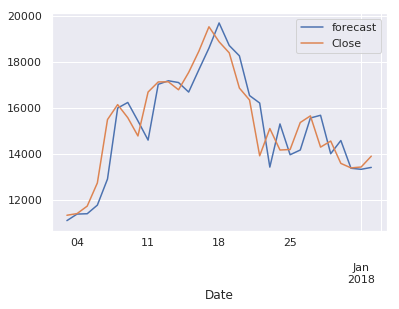

In [176]:
result.plot_predict(start=1060, end=1090)

## Conclusions

ARIMA performs well for next days predictions but performs poor for longer terms like given last few days price predict next 5-7 days prices. RNN perform consistently upto 6 days. Random Forest usually perform poorly on validation set and unseen patterns. RNN and ARIMA model perform well but fail to predict the hype or the unusal spike caused by rumors or fake news. One can use sentiments from twitter to incorporate these changes.